## The yoga pose detection and classification using Flask and Machine Learning 

# The dataset accuiqisuation:
I have taken a yoga pose detection dataset from kaggle which contained images of 5 asanas names as  
 1.plank
2. Goddess
3. Warrior
4. Tree
5. Downdog
The data set had two folders train and test and had 400 images in the train set and almost 200 images in the test dataset

# The data augumentation and processing of the data
This is is a very crucial step as the dataset is small so I had first implemented the bounding box stretgey using the yolov and then resized the cropped image as necessary

# The pretrained model:
Here I have taken the mobile net v2 model and trained it accordingly. Here I added the dropout and the normalisation for better outputs


1. IMPORTING LIBRARIES
2. UPLOADING DATASETS
3. DATA PREPROCESSING AND DATA AUGUMENTATION
4. LOADING THE PRETRAINED MODEL
5. CONVERTING THE IMAGES TO RGB
6. TRAINING AND THE TESTING SET
7. MODEL TRAINING
8. ACCURACY
9. LOSS PLOTS
10. SAVING THE MODEL AND PREDICTIONS


## 1. IMPORTING LIBRARIES

In [14]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from tensorflow.keras.applications import MobileNetV2
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [214]:
pip install yolov5


Note: you may need to restart the kernel to use updated packages.


 ## 2. UPLOADING DATASETS

In [56]:
import os
from PIL import Image
import torch

# Load YOLOv5 model (pre-trained)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Directory containing your training dataset
train_dir = r'C:\Users\kolla\Desktop\Jupyter\dataset\TRAIN'
output_dir = r'C:\Users\kolla\Desktop\Jupyter\dataset\CROPPED_TRAIN'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Process each subdirectory (class folder) in the training dataset
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if not os.path.isdir(class_path):  # Skip if not a directory
        continue
    
    print(f"Processing class folder: {class_name}...")  # Progress update for folders
    
    # Create a subdirectory for this class in the output folder
    class_output_dir = os.path.join(output_dir, class_name)
    os.makedirs(class_output_dir, exist_ok=True)
    
    # Process each image in the class folder
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        try:
            img = Image.open(image_path)
            results = model(img)
            
            # Extract bounding boxes for detected persons
            for box in results.xyxy[0]:
                if int(box[5]) == 0:  # Class 'person' in COCO dataset
                    xmin, ymin, xmax, ymax = map(int, box[:4])
                    
                    # Crop and resize the image
                    cropped_img = img.crop((xmin, ymin, xmax, ymax))
                    cropped_img_resized = cropped_img.resize((224, 224))
                    
                    # Save the cropped image
                    output_path = os.path.join(class_output_dir, image_name)
                    cropped_img_resized.save(output_path)
        
        except Exception as e:
            # Handle errors silently
            continue

print("Dataset processing completed!")


Using cache found in C:\Users\kolla/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-12-11 Python-3.12.7 torch-2.5.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
C:\Users\kolla/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kolla/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processing class folder: downdog...


C:\Users\kolla/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kolla/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kolla/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kolla/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kolla/.cache\torch\hub\ultralytics_yolov5_master\models

Processing class folder: goddess...


C:\Users\kolla/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kolla/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kolla/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kolla/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kolla/.cache\torch\hub\ultralytics_yolov5_master\models

Processing class folder: plank...


C:\Users\kolla/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kolla/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kolla/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kolla/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kolla/.cache\torch\hub\ultralytics_yolov5_master\models

Processing class folder: tree...


C:\Users\kolla/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kolla/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kolla/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kolla/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kolla/.cache\torch\hub\ultralytics_yolov5_master\models

Processing class folder: warrior2...


C:\Users\kolla/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kolla/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kolla/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kolla/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\kolla/.cache\torch\hub\ultralytics_yolov5_master\models

Dataset processing completed!


## 3. DATA PREPROCESSING AND DATA AUGUMENTATION

In [16]:
IMAGE_SIZE = [224, 224]

In [18]:
train_path = 'dataset/CROPPED_TRAIN'
valid_path = 'dataset/TEST'

In [20]:
IMAGE_SIZE = [224, 224]

# Initialize the MobileNetV2 model
mobile = MobileNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [22]:
import os
from glob import glob
base_path = 'dataset/CROPPED_TRAIN'
folders = [folder for folder in glob(os.path.join(base_path, '*')) if os.path.isdir(folder)]
folders = folders[:5]
print(folders)

['dataset/CROPPED_TRAIN\\downdog', 'dataset/CROPPED_TRAIN\\goddess', 'dataset/CROPPED_TRAIN\\plank', 'dataset/CROPPED_TRAIN\\tree', 'dataset/CROPPED_TRAIN\\warrior2']


## 4. LOADING THE PRETRAINED MODEL

In [24]:

for layer in mobile.layers:
    layer.trainable = False


# Add a custom classification head
x = Flatten()(mobile.output)  # Flatten the output of the MobileNetV2
prediction = Dense(len(folders), activation='softmax')(x)  # Custom output layer for classification

# Create the final model
model = Model(inputs=mobile.input, outputs=prediction)

# Print model summary to confirm the architecture
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,571,589 (9.81 MB)

 Trainable params: 313,605 (1.20 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

## 5. CONVERTING THE IMAGES TO RGB

In [26]:
import os
from PIL import Image

def preprocess_images_to_rgb(directory):
    """
    Converts all images in the specified directory to RGB format.
    """
    for subdir, _, files in os.walk(directory):
        for file in files:
            filepath = os.path.join(subdir, file)
            try:
                with Image.open(filepath) as img:
                    # Check if the image is not already in RGB mode
                    if img.mode != 'RGB':
                        img = img.convert('RGB')  # Convert to RGB
                        img.save(filepath)  # Save the updated image
            except Exception as e:
                print(f"Error processing {filepath}: {e}")

# Run the preprocessing function on your dataset
preprocess_images_to_rgb('dataset/CROPPED_TRAIN')
preprocess_images_to_rgb('dataset/TEST')

In [28]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, save_img

# Define the input and output paths
input_path = 'dataset/CROPPED_TRAIN'
output_path = 'dataset/AUGMENTED_TRAIN'

# Create the output directory if it doesn't exist
os.makedirs(output_path, exist_ok=True)

# Set up the augmentation generator
datagen = ImageDataGenerator(
    rotation_range=20,  # Rotate images by up to 30 degrees
    width_shift_range=0.2,  # Shift images horizontally by 20%
    height_shift_range=0.2,  # Shift images vertically by 20%
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Zoom in/out by 20%
    horizontal_flip=True,  # Flip images horizontally
    brightness_range=[0.8, 1.2],  # Adjust brightness
    fill_mode='nearest'  # Fill pixels when transformed
)

# Iterate through each class folder
for folder_name in os.listdir(input_path):
    class_path = os.path.join(input_path, folder_name)
    if not os.path.isdir(class_path):
        continue

    # Create output subdirectory for the class
    output_class_path = os.path.join(output_path, folder_name)
    os.makedirs(output_class_path, exist_ok=True)

    # Iterate through each image in the folder
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        if not img_path.lower().endswith(('png', 'jpg', 'jpeg')):
            continue

        # Load and convert the image to an array
        img = load_img(img_path)
        img_array = img_to_array(img)
        img_array = img_array.reshape((1,) + img_array.shape)  # Add batch dimension


        
        # Generate augmented images
        save_count = 0
        for batch in datagen.flow(img_array, batch_size=1,
                                  save_to_dir=output_class_path,
                                  save_prefix='aug',
                                  save_format='jpg'):
            save_count += 1

            if save_count >=5:  # Generate 10 augmented images per original image
                break

print(f"Augmented data saved to {output_path}.")


Augmented data saved to dataset/AUGMENTED_TRAIN.


## 6. TRAINING AND THE TESTING SET

In [6]:
training_set = train_datagen.flow_from_directory(
    'dataset/AUGMENTED_TRAIN',
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    'dataset/TEST',
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'
)


Found 4707 images belonging to 5 classes.
Found 470 images belonging to 5 classes.


## 7. MODEL TRAINING

In [29]:
from keras.layers import Dropout, Flatten, Dense
x = Flatten()(mobile.output)
x = Dense(1024, activation='relu', kernel_regularizer='l2')(x)  # Add L2 regularization
x = Dropout(0.5)(x)  # Dropout with 50%
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=mobile.input, outputs=prediction)


In [30]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,  # Reduce LR if validation loss does not improve for 3 epochs
    verbose=1
)

In [31]:
for layer in mobile.layers[-20:]:  # Unfreeze the last 20 layers
    layer.trainable = True

In [34]:

from keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Adjust initial learning rate as needed
    loss='categorical_crossentropy',  # Use categorical crossentropy for multi-class classification
    metrics=['accuracy']  # Track accuracy during training
)

# Now you can fit the model
model.fit(
    training_set,  
    validation_data=test_set,
    epochs=20,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set),
    callbacks=[lr_scheduler]  # Include your learning rate scheduler here
)

C:\Users\kolla\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 439s 1s/step - accuracy: 0.5994 - loss: 18.4840 - val_accuracy: 0.7383 - val_loss: 13.4178 - learning_rate: 1.0000e-04
Epoch 2/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 412s 1s/step - accuracy: 0.8487 - loss: 11.6023 - val_accuracy: 0.7553 - val_loss: 9.8803 - learning_rate: 1.0000e-04
Epoch 3/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 424s 1s/step - accuracy: 0.9061 - loss: 8.1455 - val_accuracy: 0.7936 - val_loss: 7.0067 - learning_rate: 1.0000e-04
Epoch 4/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 398s 1s/step - accuracy: 0.9377 - loss: 5.7096 - val_accuracy: 0.8149 - val_loss: 5.3002 - learning_rate: 1.0000e-04
Epoch 5/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 469s 2s/step - accuracy: 0.9503 - loss: 4.0405 - val_accuracy: 0.7787 - val_loss: 4.1094 - learning_rate: 1.0000e-04
Epoch 6/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 452s 2s/step - accuracy: 0.9508 - loss: 2.9206 - val_accuracy: 0.8809 - val_loss: 2.6412 - learning_rate: 1.0000e-04
Epoch 7/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 429s 1s/step - 

In [206]:
# Check the structure of the labels
images, labels = next(training_set)  # Get a batch of images and labels
print(f"Shape of labels: {labels.shape}")
print(f"First label sample: {labels[0]}")


Shape of labels: (16, 5)
First label sample: [1. 0. 0. 0. 0.]


## 8. ACCURACY

In [86]:
# Evaluate the model on the test set
val_loss, val_accuracy = model.evaluate(test_set, steps=len(test_set))
print(f" Accuracy: {val_accuracy * 100:.2f}%")

30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9189 - loss: 0.5307
 Accuracy: 91.06%


## 9. LOSS PLOTS

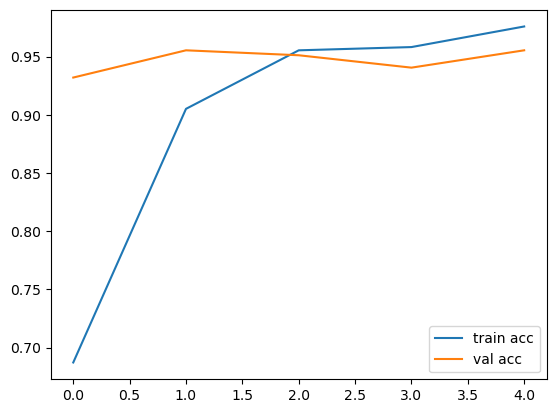

<Figure size 640x480 with 0 Axes>

In [123]:
plt.plot(r.history['accuracy'], label='train acc')  # Changed 'acc' to 'accuracy'
plt.plot(r.history['val_accuracy'], label='val acc')  # Changed 'val_acc' to 'val_accuracy'
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

## 10. SAVING THE MODEL AND PREDICTIONS

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


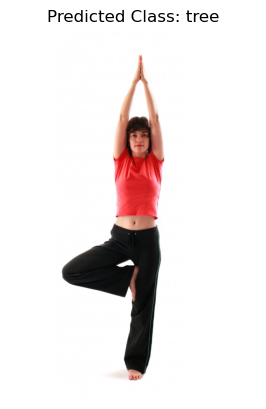

In [67]:
import numpy as np
import tensorflow as tf
from keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the saved model
model = load_model('facefeatures_new_model.keras')

# Function to load and preprocess the image for prediction
def preprocess_image(img_path):
    # Load the image using Keras' image module
    img = image.load_img(img_path, target_size=(224, 224))  # Resize image to match model input
    img_array = image.img_to_array(img)  # Convert image to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize image (assuming model was trained with normalization)
    return img_array

# Example: Predict on a new image
img_path = r"C:\Users\kolla\Desktop\Jupyter\dataset\TEST\tree\00000007.jpg"  # Change to your image path
preprocessed_img = preprocess_image(img_path)
prediction = model.predict(preprocessed_img)
predicted_class = np.argmax(prediction, axis=1)
class_names = ['downdog', 'goddess', 'plank', 'tree', 'warrior2'] 
predicted_label = class_names[predicted_class[0]]

# Show the image and prediction result
img = image.load_img(img_path)
plt.imshow(img)
plt.title(f'Predicted Class: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


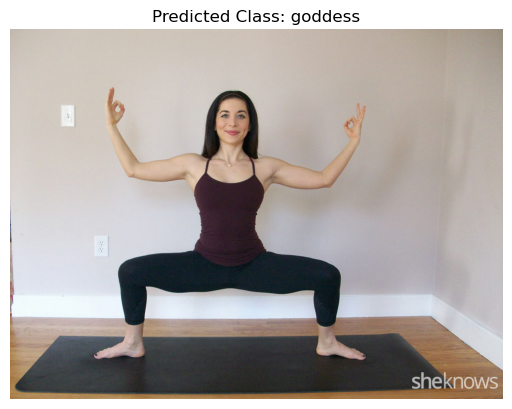

In [69]:

# Function to load and preprocess the image for prediction
def preprocess_image(img_path):
    # Load the image using Keras' image module
    img = image.load_img(img_path, target_size=(224, 224))  # Resize image to match model input
    img_array = image.img_to_array(img)  # Convert image to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize image (assuming model was trained with normalization)
    return img_array

# Example: Predict on a new image
img_path = r"C:\Users\kolla\Desktop\Jupyter\dataset\TEST\goddess\00000002.jpeg"  # Change to your image path
preprocessed_img = preprocess_image(img_path)
prediction = model.predict(preprocessed_img)
predicted_class = np.argmax(prediction, axis=1)
class_names = ['downdog', 'goddess', 'plank', 'tree', 'warrior2'] 
predicted_label = class_names[predicted_class[0]]

# Show the image and prediction result
img = image.load_img(img_path)
plt.imshow(img)
plt.title(f'Predicted Class: {predicted_label}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


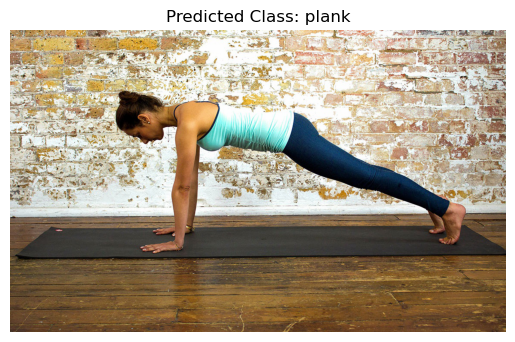

In [71]:

# Function to load and preprocess the image for prediction
def preprocess_image(img_path):
    # Load the image using Keras' image module
    img = image.load_img(img_path, target_size=(224, 224))  # Resize image to match model input
    img_array = image.img_to_array(img)  # Convert image to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize image (assuming model was trained with normalization)
    return img_array

# Example: Predict on a new image
img_path = r"C:\Users\kolla\Desktop\Jupyter\dataset\TEST\plank\00000010.jpg" # Change to your image path
preprocessed_img = preprocess_image(img_path)
prediction = model.predict(preprocessed_img)
predicted_class = np.argmax(prediction, axis=1)
class_names = ['downdog', 'goddess', 'plank', 'tree', 'warrior2'] 
predicted_label = class_names[predicted_class[0]]

# Show the image and prediction result
img = image.load_img(img_path)
plt.imshow(img)
plt.title(f'Predicted Class: {predicted_label}')
plt.axis('off')
plt.show()
